In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


CARGA DE DATASETS

In [115]:
data_train = pd.read_csv('properties_colombia_train.csv')
data_test = pd.read_csv('properties_colombia_test.csv')

In [116]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [117]:
data_train.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


FORMATEO DE COLUMNAS:
<p>start_date ->date -> to_ordinal </p>
<p>end_date -> date -> to_ordinal </p>
<p>created_on -> date -> to_ordinal </p>


In [118]:
# Para verificar cantidad de datos con año 2020, 2021 y 9999 
df=data_train.end_date.dropna().str.split('-', expand=True)
df = df.astype({0:int , 1:int, 2:int})
df.loc[:,0].value_counts()

2020    144752
2021     40823
9999     11974
Name: 0, dtype: int64

In [119]:
# Asigna None a fechas que comienzan con 9999-
data_train['end_date'] = data_train['end_date'].map(lambda x: None if x.split('-')[0]=='9999' else x) 

In [120]:
# Conversion de tipo de dato a date de las tres columnas de con fechas
data_train['start_date'] = pd.to_datetime(data_train['start_date']) 
data_train['created_on'] = pd.to_datetime(data_train['created_on']) 
data_train['end_date'] = pd.to_datetime(data_train['end_date']) 


In [121]:

data_train[['start_date', 'end_date', 'created_on']].describe(datetime_is_numeric=True)

,start_date,end_date,created_on
count,197549,185575,197549
mean,2020-10-10 10:29:52.701557248,2020-11-19 15:40:46.448067072,2020-10-10 10:29:52.701557248
min,2020-07-26 00:00:00,2020-07-26 00:00:00,2020-07-26 00:00:00
25%,2020-08-29 00:00:00,2020-09-23 00:00:00,2020-08-29 00:00:00
50%,2020-10-13 00:00:00,2020-11-13 00:00:00,2020-10-13 00:00:00
75%,2020-11-21 00:00:00,2020-12-22 00:00:00,2020-11-21 00:00:00
max,2020-12-31 00:00:00,2021-10-18 00:00:00,2020-12-31 00:00:00


In [122]:
import datetime as dt
data_train['start_date'] =  data_train['start_date'].map(dt.datetime.toordinal)
data_train['created_on'] =  data_train['created_on'].map(dt.datetime.toordinal)
data_train['end_date'] =  data_train['end_date'].map(dt.datetime.toordinal)


MANEJO DE INCONSISTENCIAS

Eliminación de datos con precio en dólares

In [123]:
ind_dolar=data_train[data_train.currency=='USD'].index.tolist()
data_train.drop(index=ind_dolar , inplace=True)

Eliminación de nulos basados en columnas 'currency', 'price'

In [124]:
data_train.dropna(subset=['price','currency'], inplace=True) # se eliminan 67 filas que no tienen price o currency

Valores de lat() y lon() fuera de rango

In [125]:
# Visualizar fuera de rango
#data_train[['lat' , 'lon','title', 'description', 'property_type', 'l2', 'l3', 'price']][(data_train.lat<-4.2) | (data_train.lat>13.4)] # visualizar lat fuera de rango
#data_train[['lon' , 'l2', 'l3']][(data_train.lon<-81.74) | (data_train.lon>-67)] # visualizar lon fuera de rango

In [126]:
# Eliminar lat fuera de rango
ind_out_of_range =data_train.index[(data_train.lat<-4.2) | (data_train.lat>13.4)].tolist() 
data_train.drop(index=ind_out_of_range, inplace=True)

In [127]:
# comprobación de lat y lon
#data_train[['lat','lon']].describe()

Identificacion y eliminación de columnas que no dan información:

In [128]:
# verificación de utilidad de columna created_on
#dif_fecha=data_train.start_date - data_train.created_on #calcula diferencia entre start_date y created_on
#dif_fecha.value_counts() # todas las diferencias son 0 luego son dos columnas exactamente iguales

In [129]:
# verificación de utilidad de columna geometry
#data_train[['lat','lon','geometry']].isnull().value_counts()# cuenta la cantidad de conbinaciones de nulos que hay entre lat, lon y geometry
#temp=data_train[['lat','lon','geometry']][data_train.lat.isnull()] #crea dataframe con lat==null
#temp.geometry.value_counts() # se verifica  que todas las filas con lat==null tambien geometry=='POINT EMPTY'

In [130]:

columnas_descartables = ['id','Unnamed: 0','created_on','l1', 'operation_type', 'ad_type', 'price_period', 'geometry']
data_train.drop(columns=columnas_descartables, inplace=True) # eliminación de columnas que no agregan info

Eliminación de duplicados, pendiente!!!!!

In [131]:
data_sin_fecha= data_train.drop(columns=['start_date','end_date']).duplicated().value_counts()
data_sin_fecha= data_train.drop(columns=['start_date','end_date']).drop_duplicates()

In [133]:
data_train.loc[:,['title','description','price', 'l2','l3','lat','lon']].duplicated().value_counts()

False    121763
True      75709
dtype: int64

imputación de valores faltantes pendiente!!!!!!!!!

EDA (selección de features)

- creación de target

(0.0, 2000000000.0)

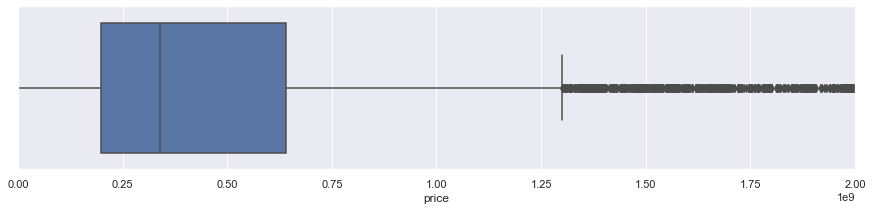

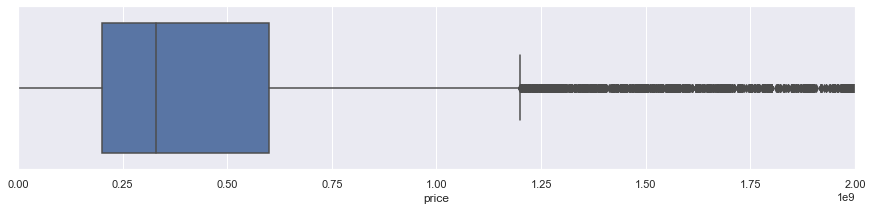

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x=data_sin_fecha['price'])
plt.xlim(0,2000000000)
plt.figure(figsize=(15,3))
sns.boxplot(x=data_train['price'])
plt.xlim(0,2000000000)

In [134]:
price_mean = data_train.price.mean()
data_train['target'] = data_train.price.map(lambda x: 'caro' if x>= price_mean else 'barato')

- verificar balanceo

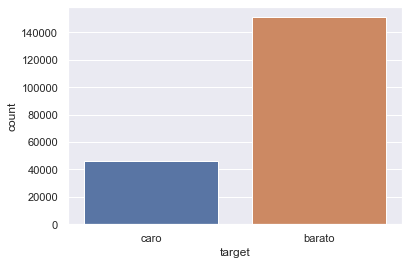

In [135]:
sns.countplot(x='target', data=data_train )
plt.show()

- ver correlación: corr() , pairplot()

In [138]:
# se crea matriz de correlación entre variables numericas
corr = data_train[['start_date', 'end_date', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price']].corr(method='pearson')

<AxesSubplot:>

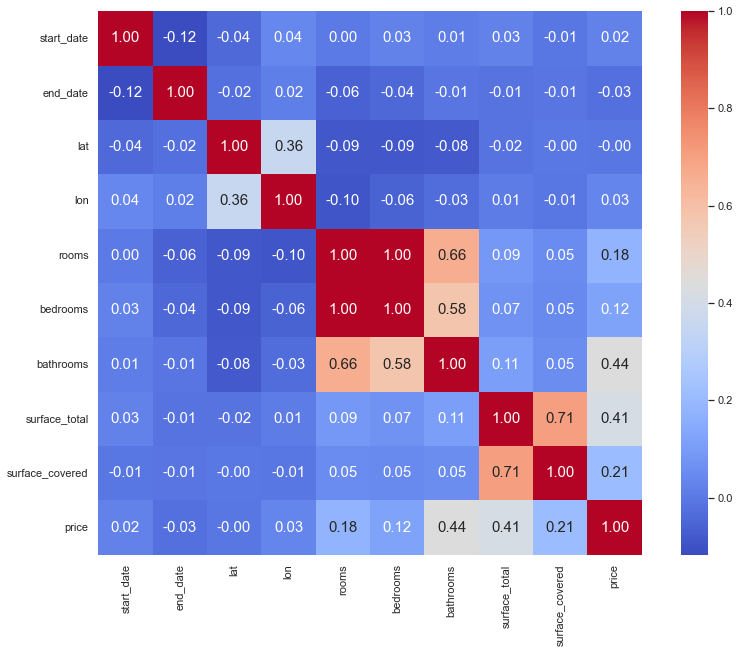

In [139]:

plt.figure(figsize=(14,10))
cols_heatmap=['start_date', 'end_date', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
sns.heatmap(corr, square=True, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':15}, xticklabels=cols_heatmap, yticklabels=cols_heatmap)

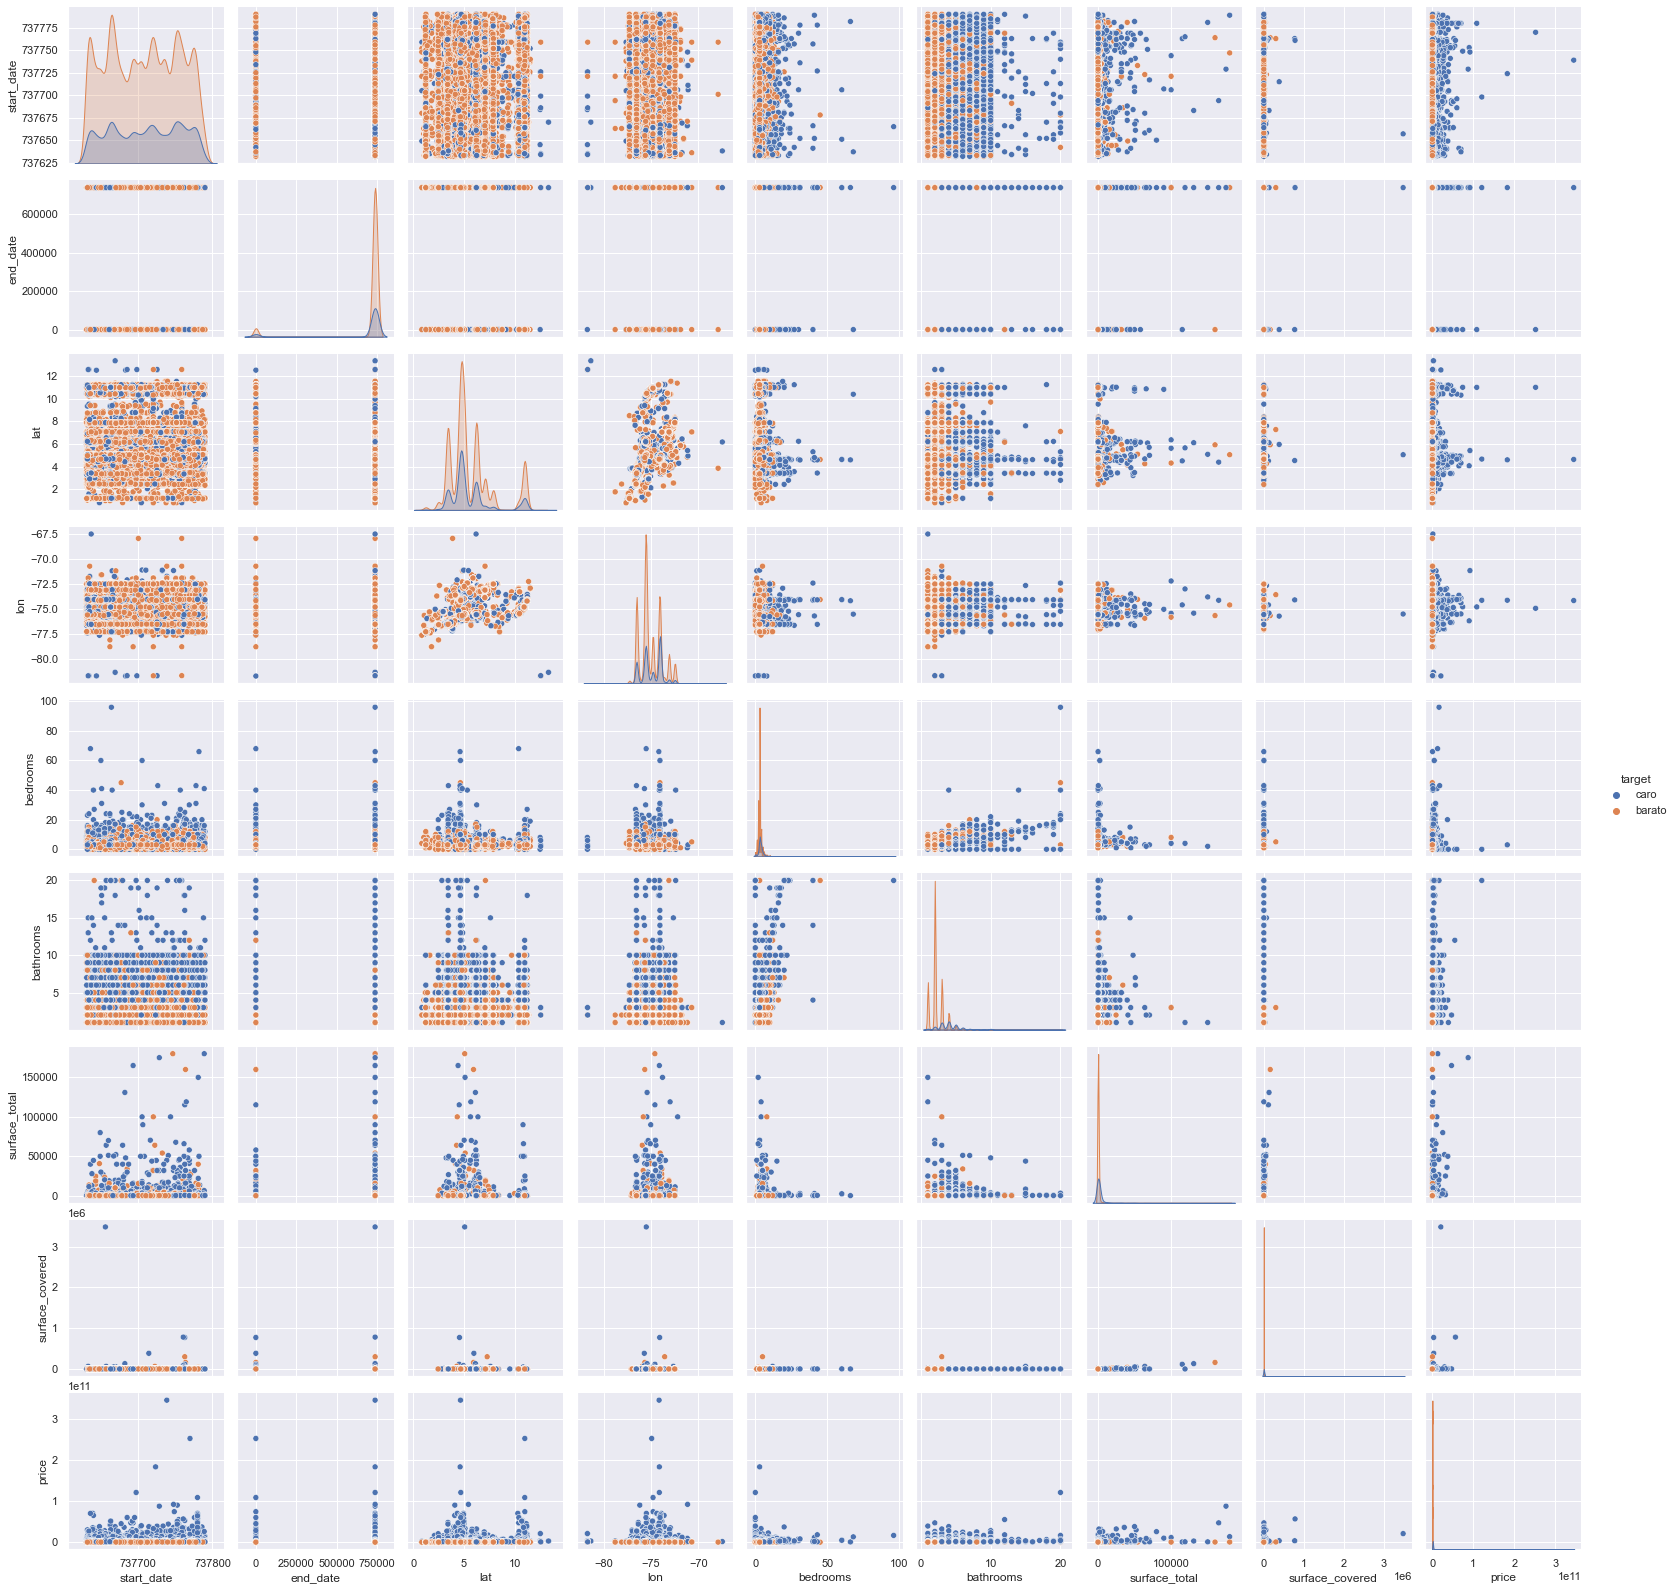

In [141]:
sns.pairplot(data=data_train[['start_date', 'end_date', 'lat', 'lon', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered','price' ,'target']], hue='target')

hasta aquí se seleccionan los features surface_covered, bathrooms y rooms

- seleccion de features con sklearn.feature_selection.SelectKBest

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

In [105]:
selector_price= SelectKBest(mutual_info_regression, k=4)
selector_target= SelectKBest(mutual_info_classif, k=4)

In [106]:
X= data_train[['start_date', 'end_date', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y_price = data_train[['price']]
y_target = data_train[['target']]

In [140]:
data_train[['start_date', 'end_date', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price', 'target']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197472 entries, 0 to 197548
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       197472 non-null  int64  
 1   end_date         197472 non-null  int64  
 2   lat              147987 non-null  float64
 3   lon              147987 non-null  float64
 4   rooms            27492 non-null   float64
 5   bedrooms         40468 non-null   float64
 6   bathrooms        156414 non-null  float64
 7   surface_total    6942 non-null    float64
 8   surface_covered  9755 non-null    float64
 9   price            197472 non-null  float64
 10  target           197472 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 18.1+ MB


In [107]:
selector_price.fit(X,y_price)
selector_target.fit(X,y_target)

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

- verificar escala

- detectar outliers

PREPROCESAMIENTO

- StandardScaler

- LabelEncoder

- Reducción de dimensionalidad.